In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import linear_kernel


# Read dataset

In [2]:
df=pd.read_csv(r'The Movies Dataset/movies_metadata.csv', low_memory=False)

df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')  # Converts to numeric, replacing invalid entries with NaN

df['overview'] = df['overview'].fillna('')
df['tagline'] = df['tagline'].fillna('')
df['status'] = df['status'].fillna('Released')
df['runtime'] = df['runtime'].fillna(90)
df = df[df['adult'] != 'True']

df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Converts to numeric, replacing invalid entries with NaN
df['year'] = df['year'].fillna(2014)
df['year'] = df['year'].astype('int')


df.drop(columns=['belongs_to_collection', 'homepage', 'poster_path', 'spoken_languages', 'adult', 'video', 'release_date', 'status', 'original_title'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['id', 'title'], inplace=True)

df['id'] = df['id'].astype('int')
df['budget'] = df['budget'].astype('float')
df['runtime'] = df['runtime'].astype('int')


In [3]:
df['genres'].head(3)

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
Name: genres, dtype: object

In [4]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['genres'].head(3)

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
Name: genres, dtype: object

## dataframe information

In [5]:
print(f'Shape of the dataframe: {df.shape}')

print('\n')

print(f'columns: {df.columns}')

Shape of the dataframe: (45393, 16)


columns: Index(['budget', 'genres', 'id', 'imdb_id', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries', 'revenue',
       'runtime', 'tagline', 'title', 'vote_average', 'vote_count', 'year'],
      dtype='object')


In [6]:
print(f'Information about the dataframe: \n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 45393 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45393 non-null  float64
 1   genres                45393 non-null  object 
 2   id                    45393 non-null  int32  
 3   imdb_id               45393 non-null  object 
 4   original_language     45393 non-null  object 
 5   overview              45393 non-null  object 
 6   popularity            45393 non-null  float64
 7   production_companies  45393 non-null  object 
 8   production_countries  45393 non-null  object 
 9   revenue               45393 non-null  float64
 10  runtime               45393 non-null  int32  
 11  tagline               45393 non-null  object 
 12  title                 45393 non-null  object 
 13  vote_average          45393 non-null  float64
 14  vote_count            45393 non-null  float64
 15  year                  45

In [7]:
df.head(2)

,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,year
0,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81,,Toy Story,7.7,5415.0,1995
1,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995


# **Knowledge based Recommender**

In [8]:
import pandas as pd 
import numpy as np
from ast import literal_eval

movies_d=pd.read_csv(r'The Movies Dataset/movies_metadata.csv', low_memory=False)

movies_d['popularity'] = pd.to_numeric(movies_d['popularity'], errors='coerce')  # Converts to numeric, replacing invalid entries with NaN

movies_d['overview'] = movies_d['overview'].fillna('')
movies_d['tagline'] = movies_d['tagline'].fillna('')
movies_d['status'] = movies_d['status'].fillna('Released')
movies_d['runtime'] = movies_d['runtime'].fillna(90)
movies_d = movies_d[movies_d['adult'] != 'True']

movies_d['year'] = pd.to_datetime(movies_d['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
movies_d['year'] = pd.to_numeric(df['year'], errors='coerce')  # Converts to numeric, replacing invalid entries with NaN
movies_d['year'] = movies_d['year'].fillna(2014)


movies_d.drop(columns=['belongs_to_collection', 'homepage', 'poster_path', 'spoken_languages', 'adult', 'video', 'release_date', 'status', 'original_title'], inplace=True)

movies_d.dropna(inplace=True)
movies_d.drop_duplicates(inplace=True)
movies_d.drop_duplicates(subset=['id', 'title'], inplace=True)

movies_d['id'] = movies_d['id'].astype('int')
movies_d['budget'] = movies_d['budget'].astype('float')
movies_d['runtime'] = movies_d['runtime'].astype('int')

movies_d['genres'] = movies_d['genres'].apply(literal_eval)
movies_d['genres'] = movies_d['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies_d['production_countries'] = movies_d['production_countries'].apply(literal_eval)
movies_d['production_countries'] = movies_d['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies_d['production_companies'] = movies_d['production_companies'].apply(literal_eval)
movies_d['production_companies'] = movies_d['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [9]:
credits = pd.read_csv('The Movies Dataset/credits.csv')
credits.drop_duplicates(inplace=True)
credits.drop_duplicates(subset= ['id'],inplace=True)
credits['id'] = credits['id'].astype('int')

keywords = pd.read_csv('The Movies Dataset/keywords.csv')
keywords.drop_duplicates(inplace=True)
keywords.drop_duplicates(subset= ['id'],inplace=True)
keywords['id'] = keywords['id'].astype('int')

In [10]:
movies_d = movies_d.merge(credits, on='id')

movies_d = movies_d.merge(keywords, on='id')

In [11]:
movies_df = movies_d.copy()  # Ensures no linkage to the original DataFrame
movies_df['cast'] = movies_df['cast'].apply(literal_eval)
movies_df['crew'] = movies_df['crew'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
movies_df['cast_size'] = movies_df['cast'].apply(lambda x: len(x))
movies_df['crew_size'] = movies_df['crew'].apply(lambda x: len(x))

In [12]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

movies_df['director'] = movies_df['crew'].apply(get_director)

In [13]:
movies_df['actor'] = movies_df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_df['actor'] = movies_df['actor'].apply(lambda x: x[:3] if len(x) >=3 else x)

movies_df['character'] = movies_df['cast'].apply(lambda x: [i['character'] for i in x] if isinstance(x, list) else [])
movies_df['character'] = movies_df['character'].apply(lambda x: x[:3] if len(x) >=3 else x)

movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies_df.drop(columns=['crew', 'cast'], inplace=True)

In [14]:
movies_df = movies_df[['imdb_id', 'id', 'title', 'year', 'genres', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue', 'original_language', 'production_countries', 'runtime',
                       'production_companies', 'director', 'actor', 'character', 'cast_size', 'crew_size', 'overview', 'tagline', 'keywords']]

In [15]:
print(f'Shape of the movies dataframe: {movies_df.shape}')

movies_df.head(2)

Shape of the movies dataframe: (45392, 22)


,imdb_id,id,title,year,genres,vote_average,vote_count,popularity,budget,revenue,...,runtime,production_companies,director,actor,character,cast_size,crew_size,overview,tagline,keywords
0,tt0114709,862,Toy Story,1995.0,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000.0,373554033.0,...,81,[Pixar Animation Studios],John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva..."
1,tt0113497,8844,Jumanji,1995.0,"[Adventure, Fantasy, Family]",6.9,2413.0,17.015539,65000000.0,262797249.0,...,104,"[TriStar Pictures, Teitler Film, Interscope Co...",Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[Alan Parrish, Samuel Alan Parrish / Van Pelt,...",26,16,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[board game, disappearance, based on children'..."


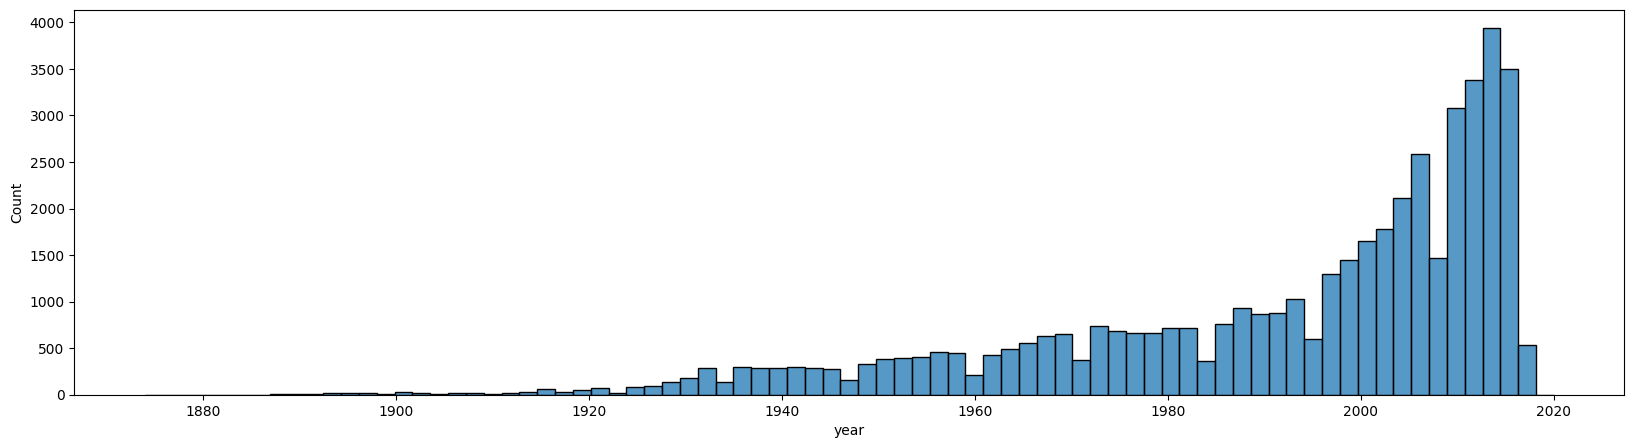

In [16]:
#checking Distribution of years
plt.figure(figsize=(20,5))
sns.histplot(movies_df['year'])
plt.show()

## movies_with_ratings

In [17]:
links_small = pd.read_csv('The Movies Dataset/links_small.csv')

links_small.rename(columns={'tmdbId': 'id'}, inplace=True)
links_small.drop(columns=['imdbId'], inplace=True)
links_small.dropna(inplace=True)
links_small.drop_duplicates(inplace=True)
links_small.drop_duplicates(subset = ['id'] ,inplace=True)

links_small['id'] = links_small['id'].astype('int')

print(f'Shape of the links_small dataframe: {links_small.shape}')

Shape of the links_small dataframe: (9112, 2)


In [18]:
ratings = pd.read_csv('The Movies Dataset/ratings_small.csv')
ratings = ratings.merge(links_small, on='movieId')

ratings = ratings[['userId', 'id', 'rating', 'timestamp']]

ratings.dropna(inplace=True)
ratings.drop_duplicates(inplace=True)

print(f'Shape of the links_small dataframe: {ratings.shape}')

ratings.head(3)

Shape of the links_small dataframe: (99933, 4)


,userId,id,rating,timestamp
0,1,9909,2.5,1260759144
1,1,11360,3.0,1260759179
2,1,819,3.0,1260759182


In [19]:
movies_in_ratings = movies_df[movies_df['id'].isin(ratings['id'])]

print(f'Shape of the movies_with_ratings dataframe: {movies_in_ratings.shape}')

movies_in_ratings.head(3)

Shape of the movies_with_ratings dataframe: (9025, 22)


,imdb_id,id,title,year,genres,vote_average,vote_count,popularity,budget,revenue,...,runtime,production_companies,director,actor,character,cast_size,crew_size,overview,tagline,keywords
0,tt0114709,862,Toy Story,1995.0,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000.0,373554033.0,...,81,[Pixar Animation Studios],John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva..."
1,tt0113497,8844,Jumanji,1995.0,"[Adventure, Fantasy, Family]",6.9,2413.0,17.015539,65000000.0,262797249.0,...,104,"[TriStar Pictures, Teitler Film, Interscope Co...",Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[Alan Parrish, Samuel Alan Parrish / Van Pelt,...",26,16,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[board game, disappearance, based on children'..."
2,tt0113228,15602,Grumpier Old Men,1995.0,"[Romance, Comedy]",6.5,92.0,11.712900,0.0,0.0,...,101,"[Warner Bros., Lancaster Gate]",Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[Max Goldman, John Gustafson, Ariel Gustafson]",7,4,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[fishing, best friend, duringcreditsstinger, o..."


## Create a new dataFrame for the mean of ratings for each product

In [20]:
movies_with_ratings = movies_in_ratings.merge(ratings, on='id')
movies_with_ratings.shape

(99810, 25)

In [21]:
average_rating_df = movies_with_ratings[["title", "rating"]].groupby('title').mean()
average_rating_df.head(3)

,rating
title,
$9.99,3.833333
'Neath the Arizona Skies,0.500000
"'night, Mother",5.000000


In [22]:
sorted_average_ratings = average_rating_df.sort_values("rating",ascending=False)
sorted_average_ratings.head(5)

,rating
title,
Female Perversions,5.0
Lake of Fire,5.0
Lamerica,5.0
The Family Stone,5.0
Riding Giants,5.0


## take the high of the frequently of the rated products

In [23]:
# Create a list of only the frequently watched movies
product_popularity = movies_with_ratings["title"].value_counts()
popular_product = product_popularity[product_popularity > 50].index # can use that code without .index to show the name and their counts

print(popular_product)

Index(['Forrest Gump', 'Pulp Fiction', 'The Shawshank Redemption',
       'The Silence of the Lambs', 'Star Wars', 'Jurassic Park', 'The Matrix',
       'Toy Story', 'Schindler's List', 'Terminator 2: Judgment Day',
       ...
       'American Psycho', 'The Birds', 'Mr. & Mrs. Smith', 'Cruel Intentions',
       'My Fair Lady', 'My Big Fat Greek Wedding',
       'The Hunchback of Notre Dame', 'Chicago', 'Shutter Island',
       'Mighty Aphrodite'],
      dtype='object', name='title', length=458)


## filter the original DataFrame to include only the popular products

In [24]:
# Use this popular_product list to filter the original DataFrame
popular_product_rankings = movies_with_ratings[movies_with_ratings["title"].isin(popular_product)]

# Inspect the product watched over 50 times
popular_product_rankings.head(3)

,imdb_id,id,title,year,genres,vote_average,vote_count,popularity,budget,revenue,...,actor,character,cast_size,crew_size,overview,tagline,keywords,userId,rating,timestamp
0,tt0114709,862,Toy Story,1995.0,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000.0,373554033.0,...,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva...",7,3.0,851866703
1,tt0114709,862,Toy Story,1995.0,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000.0,373554033.0,...,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva...",9,4.0,938629179
2,tt0114709,862,Toy Story,1995.0,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000.0,373554033.0,...,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva...",13,5.0,1331380058


### Find the top 5 popular products based on their average rating

In [25]:
# Find the average rating given to these frequently watched films
popular_product_average_rankings = popular_product_rankings[["title", "rating"]].groupby('title').mean()
print(popular_product_average_rankings.sort_values(by="rating", ascending=False).head())

                            rating
title                             
The Godfather             4.487500
The Shawshank Redemption  4.487138
The Godfather: Part II    4.385185
The Usual Suspects        4.370647
Chinatown                 4.335526


# **Demographic Filtering**

#### Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

### where

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [26]:
C= df['vote_average'].mean()
print(f'Mean vote across the whole report: {C}')

# vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
# C = vote_averages.mean()

m= df['vote_count'].quantile(0.95)
print(f'Minimum votes required to be listed in the chart: {m}')

# # vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
# m = vote_counts.quantile(0.95)

Mean vote across the whole report: 5.61981583063468
Minimum votes required to be listed in the chart: 434.0


In [27]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [28]:
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
print(f'shape of the filtered dataframe: {qualified.shape}')

shape of the filtered dataframe: (2274, 6)


In [29]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qualified['wr_score'] = qualified.apply(weighted_rating, axis=1)

In [30]:
#Sort movies based on score calculated above
qualified = qualified.sort_values('wr_score', ascending=False).head(250)

### Top Movies

In [31]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr_score
314,The Shawshank Redemption,1994,8358.0,8.5,51.645403,"[Drama, Crime]",8.357825
834,The Godfather,1972,6024.0,8.5,41.109264,"[Drama, Crime]",8.306442
12481,The Dark Knight,2008,12269.0,8.3,123.167259,"[Drama, Action, Crime, Thriller]",8.208431
2843,Fight Club,1999,9678.0,8.3,63.869599,[Drama],8.184968
292,Pulp Fiction,1994,8670.0,8.3,140.950236,"[Thriller, Crime]",8.172232
351,Forrest Gump,1994,8147.0,8.2,48.307194,"[Comedy, Drama, Romance]",8.069502
522,Schindler's List,1993,4436.0,8.3,41.725123,"[Drama, History, War]",8.061150
23673,Whiplash,2014,4376.0,8.3,64.299990,[Drama],8.058170
5481,Spirited Away,2001,3968.0,8.3,41.048867,"[Fantasy, Adventure, Animation, Family]",8.035756
1154,The Empire Strikes Back,1980,5998.0,8.2,19.470959,"[Adventure, Action, Science Fiction]",8.025902


Text(0.5, 1.0, 'Popular Movies')

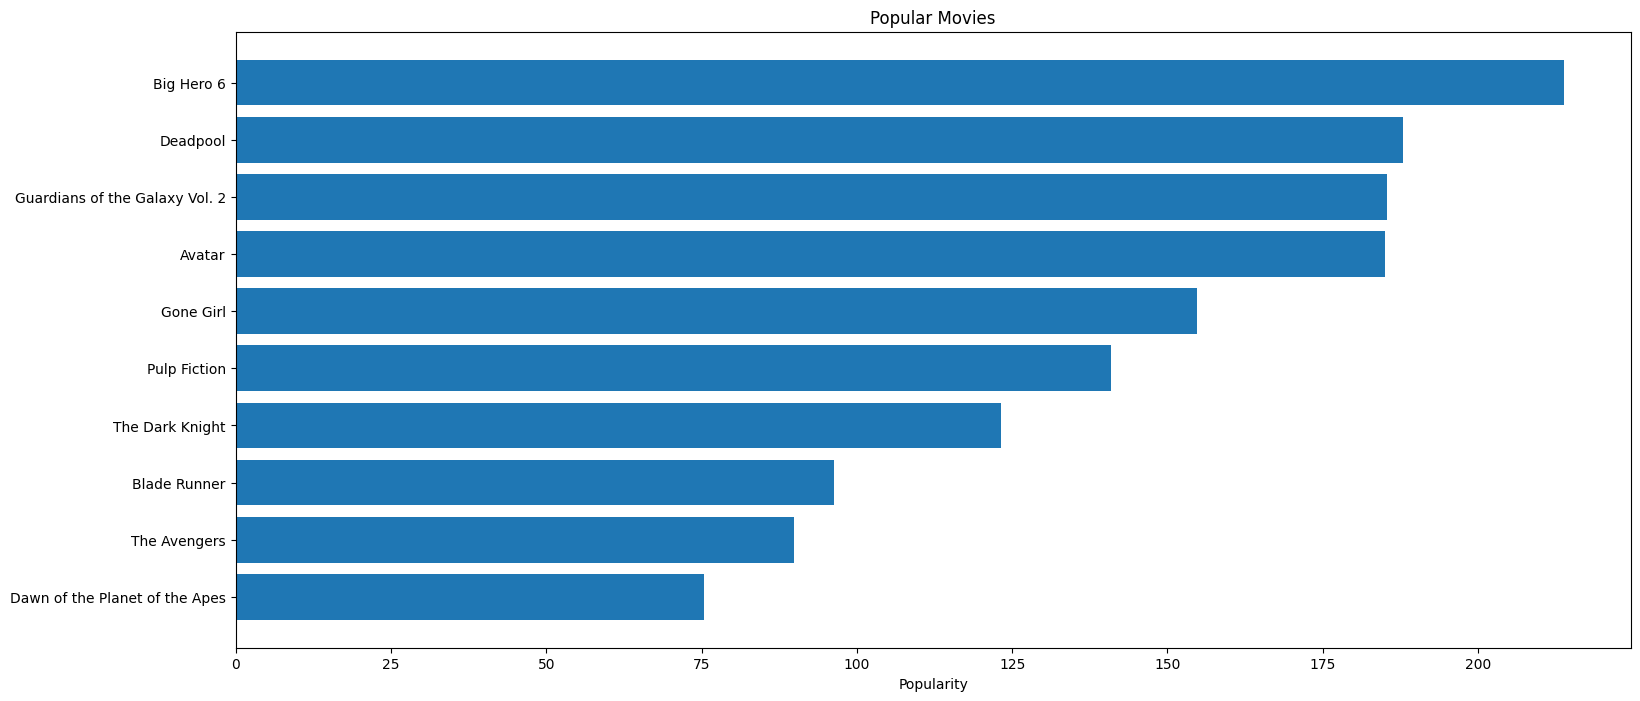

In [32]:
import matplotlib.pyplot as plt

pop= qualified.sort_values('popularity', ascending=False)

plt.figure(figsize=(18,8))
plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


### deponed of the genres on the score

In [33]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)

print(f'Shape of the genres dataframe: {gen_df.shape}')

Shape of the genres dataframe: (93378, 16)


In [34]:
def build_chart(genre, percentile=0.85):
    df = gen_df[gen_df['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count']
    vote_averages = df[df['vote_average'].notnull()]['vote_average']
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count']
    qualified['vote_average'] = qualified['vote_average']
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

In [35]:
genre_list = gen_df['genre'].value_counts().index.to_list()

print(genre_list)

['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Documentary', 'Adventure', 'Science Fiction', 'Family', 'Mystery', 'Fantasy', 'Animation', 'Foreign', 'Music', 'History', 'War', 'Western', 'TV Movie']


### Top Romance Movies

In [36]:
build_chart('Romance').head(10)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661.0,9.1,34.457024,8.701374
40251,Your Name.,2016,1030.0,8.5,34.461252,8.281296
351,Forrest Gump,1994,8147.0,8.2,48.307194,8.173553
1132,Cinema Paradiso,1988,834.0,8.2,14.177005,7.964468
40882,La La Land,2016,4745.0,7.9,19.681686,7.860594
22168,Her,2013,4215.0,7.9,13.829515,7.855744
7208,Eternal Sunshine of the Spotless Mind,2004,3758.0,7.9,12.906327,7.850489
876,Vertigo,1958,1162.0,8.0,18.208220,7.840649
3189,City Lights,1931,444.0,8.2,10.891524,7.792772
15530,Mr. Nobody,2009,1616.0,7.9,11.817059,7.788362


### Top Action Movies

In [37]:
build_chart('Action').head(10)

,title,year,vote_count,vote_average,popularity,wr
12481,The Dark Knight,2008,12269.0,8.3,123.167259,8.250466
1154,The Empire Strikes Back,1980,5998.0,8.2,19.470959,8.104236
15480,Inception,2010,14075.0,8.1,29.108149,8.059909
7000,The Lord of the Rings: The Return of the King,2003,8226.0,8.1,29.324358,8.032171
256,Star Wars,1977,6778.0,8.1,42.149697,8.018152
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892.0,8.0,32.070725,7.939624
5814,The Lord of the Rings: The Two Towers,2002,7641.0,8.0,29.423537,7.930026
23753,Guardians of the Galaxy,2014,10014.0,7.9,53.291601,7.848464
2458,The Matrix,1999,9079.0,7.9,33.366332,7.843287
4135,Scarface,1983,3017.0,8.0,11.299673,7.830315


# **Content Based Filtering**

In [38]:
links_small = pd.read_csv('The Movies Dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')


print(f'Shape of the links_small dataframe: {links_small.shape}')
links_small.head()

Shape of the links_small dataframe: (9112,)


0      862
1     8844
2    15602
3    31357
4    11862
Name: tmdbId, dtype: int32

In [39]:
smd_1 = df[df['id'].isin(links_small)]

print(smd_1.shape)
smd_1.head(3)

(9082, 16)


,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,year
0,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81,,Toy Story,7.7,5415.0,1995
1,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995
2,0.0,"[Romance, Comedy]",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995


### Movie Description Based Recommender

In [40]:
smd_1 = smd_1.copy()  # Ensures no linkage to the original DataFrame
smd_1['description'] = smd_1['title'] + ' ' + smd_1['overview'] + ' ' + smd_1['tagline']
smd_1['description'] = smd_1['description'].apply(lambda x: x.lower())

In [41]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tf.fit_transform(smd_1['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(9082, 282926)

## **Cosine similarity**

## $cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [42]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim_1 = linear_kernel(tfidf_matrix, tfidf_matrix)
# cosine_sim_1 = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_1.shape

(9082, 9082)

In [43]:
smd_1 = smd_1.reset_index()
titles = smd_1['title']
indices = pd.Series(smd_1.index, index=smd_1['title'])

In [44]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim, recommendations_num=10):
    
    recommendations_num = recommendations_num + 1
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:recommendations_num]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return titles.iloc[movie_indices]

In [45]:
get_recommendations('The Godfather', cosine_sim_1)

973      The Godfather: Part II
8382                 The Family
3508                       Made
1581    The Godfather: Part III
4195         Johnny Dangerously
5666                       Fury
2411             American Movie
29               Shanghai Triad
7755              Henry's Crime
3287          Jaws: The Revenge
Name: title, dtype: object

In [46]:
get_recommendations('The Dark Knight', cosine_sim_1)

7926                      The Dark Knight Rises
132                              Batman Forever
524                                      Batman
8222    Batman: The Dark Knight Returns, Part 2
2578               Batman: Mask of the Phantasm
1113                             Batman Returns
8160    Batman: The Dark Knight Returns, Part 1
7561                 Batman: Under the Red Hood
7896                           Batman: Year One
6141                              Batman Begins
Name: title, dtype: object

## Metadata Based Recommender

In [47]:
credits = pd.read_csv('The Movies Dataset/credits.csv')
credits.drop_duplicates(inplace=True)
credits.drop_duplicates(subset= ['id'],inplace=True)


keywords = pd.read_csv('The Movies Dataset/keywords.csv')
keywords.drop_duplicates(inplace=True)
keywords.drop_duplicates(subset= ['id'],inplace=True)

In [48]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
df['id'] = df['id'].astype('int')

In [49]:
df = df.merge(credits, on='id')

df = df.merge(keywords, on='id')

In [50]:
smd_2 = df[df['id'].isin(links_small)]
smd_2.shape

(9082, 19)

In [51]:
smd_2[['id', 'title', 'cast', 'crew', 'keywords']].head(3)

,id,title,cast,crew,keywords
0,862,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [52]:
smd_2 = smd_2.copy()  # Ensures no linkage to the original DataFrame
smd_2['cast'] = smd_2['cast'].apply(literal_eval)
smd_2['crew'] = smd_2['crew'].apply(literal_eval)
smd_2['keywords'] = smd_2['keywords'].apply(literal_eval)
smd_2['cast_size'] = smd_2['cast'].apply(lambda x: len(x))
smd_2['crew_size'] = smd_2['crew'].apply(lambda x: len(x))

In [53]:
smd_2[['id', 'title', 'cast', 'cast_size', 'crew', 'crew_size', 'keywords']].head(3)

,id,title,cast,cast_size,crew,crew_size,keywords
0,862,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...",13,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",26,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",7,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [54]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [55]:
smd_2['director'] = smd_2['crew'].apply(get_director)

In [56]:
smd_2['cast'] = smd_2['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd_2['cast'] = smd_2['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

smd_2['keywords'] = smd_2['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [57]:
smd_2[['id', 'title', 'cast', 'cast_size', 'director', 'crew_size', 'keywords']].head(3)

,id,title,cast,cast_size,director,crew_size,keywords
0,862,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",13,John Lasseter,106,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",26,Joe Johnston,16,"[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",7,Howard Deutch,4,"[fishing, best friend, duringcreditsstinger, o..."


1. **Strip Spaces and Convert to Lowercase** from all our features. This way, our engine will not confuse between **Johnny Depp** and **Johnny Galecki.** 

In [58]:
smd_2['cast'] = smd_2['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

2. **Mention Director 3 times** to give it more weight relative to the entire cast.

In [59]:
smd_2['director'] = smd_2['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd_2['director'] = smd_2['director'].apply(lambda x: [x,x, x])

#### Keywords

small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [60]:
s = smd_2.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [61]:
s = s.value_counts()
s[:5]

keyword
independent film        603
woman director          541
murder                  397
duringcreditsstinger    327
based on novel          309
Name: count, dtype: int64

In [62]:
s = s[s > 1]

In [63]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

In [64]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [65]:
smd_2['keywords'] = smd_2['keywords'].apply(filter_keywords)
smd_2['keywords'] = smd_2['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd_2['keywords'] = smd_2['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [66]:
smd_2['soup'] = smd_2['keywords'] + smd_2['cast'] + smd_2['director'] + smd_2['genres']
smd_2['soup'] = smd_2['soup'].apply(lambda x: ' '.join(x))

### CountVectorizer

In [67]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')
count_matrix = count.fit_transform(smd_2['soup'])

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_2 = cosine_similarity(count_matrix, count_matrix)

cosine_sim_2.shape

(9082, 9082)

In [69]:
smd_2 = smd_2.reset_index()
titles = smd_2['title']
indices = pd.Series(smd_2.index, index=smd_2['title'])

In [70]:
get_recommendations('The Dark Knight', cosine_sim_2)

7926         The Dark Knight Rises
6141                 Batman Begins
6539                  The Prestige
2064                     Following
7550                     Inception
4103                      Insomnia
3360                       Memento
8501                  Interstellar
7561    Batman: Under the Red Hood
1113                Batman Returns
Name: title, dtype: object

In [71]:
get_recommendations('Mean Girls', cosine_sim_2)

3298               Head Over Heels
4707                 Freaky Friday
1308              The House of Yes
6200              Just Like Heaven
7800         Mr. Popper's Penguins
7241    Ghosts of Girlfriends Past
6875     The Spiderwick Chronicles
8764                      The DUFF
6614         It's a Boy Girl Thing
7279       I Love You, Beth Cooper
Name: title, dtype: object

### Popularity and Ratings

In [72]:
def improved_recommendations(title, cosine_sim, recommendations_num=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd_2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count']
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average']
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified = qualified.copy()
    qualified['vote_count'] = qualified['vote_count']
    qualified['vote_average'] = qualified['vote_average']
    qualified['wr_score'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr_score', ascending=False).head(recommendations_num)
    return qualified

In [73]:
improved_recommendations('The Dark Knight', cosine_sim_2)

,title,vote_count,vote_average,year,wr_score
7550,Inception,14075.0,8.1,2010,8.025812
8501,Interstellar,11187.0,8.1,2014,8.007375
3360,Memento,4168.0,8.1,2000,7.866102
6539,The Prestige,4510.0,8.0,2006,7.791060
7926,The Dark Knight Rises,9263.0,7.6,2012,7.511375
6141,Batman Begins,7511.0,7.5,2005,7.397294
1113,Batman Returns,1706.0,6.6,1992,6.401215
8905,Batman v Superman: Dawn of Justice,7189.0,5.7,2016,5.695435
132,Batman Forever,1529.0,5.2,1995,5.292817
1239,Batman & Robin,1447.0,4.2,1997,4.527592


In [74]:
improved_recommendations('Mean Girls', cosine_sim_2)

,title,vote_count,vote_average,year,wr_score
1526,The Breakfast Club,2189.0,7.8,1985,7.439268
390,Dazed and Confused,588.0,7.4,1993,6.644031
8764,The DUFF,1372.0,6.8,2015,6.516390
3677,The Princess Diaries,1063.0,6.5,2001,6.244823
6200,Just Like Heaven,595.0,6.5,2005,6.128766
6875,The Spiderwick Chronicles,593.0,6.3,2008,6.012561
4707,Freaky Friday,919.0,6.0,2003,5.878049
7800,Mr. Popper's Penguins,775.0,5.7,2011,5.671216
7241,Ghosts of Girlfriends Past,716.0,5.6,2009,5.607478
7396,American Pie Presents: The Book of Love,454.0,5.1,2009,5.354054


## Using only Numerical column for **Content Based Filtering**

In [75]:
smd_2.head(3)

,index,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,year,cast,crew,keywords,cast_size,crew_size,director,soup
0,0,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,7.7,5415.0,1995,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousi, toy, boy, friendship, friend, rival...",13,106,"[johnlasseter, johnlasseter, johnlasseter]",jealousi toy boy friendship friend rivalri boy...
1,1,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.9,2413.0,1995,"[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[boardgam, disappear, basedonchildren'sbook, n...",26,16,"[joejohnston, joejohnston, joejohnston]",boardgam disappear basedonchildren'sbook newho...
2,2,0.0,"[Romance, Comedy]",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.5,92.0,1995,"[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fish, bestfriend, duringcreditssting]",7,4,"[howarddeutch, howarddeutch, howarddeutch]",fish bestfriend duringcreditssting waltermatth...


In [76]:
ndf = smd_2.select_dtypes(include=["float64","int64","float32","int32"])

ndf.drop(columns=['index','id'], inplace=True)

print(f'ndf shape is: {ndf.shape}')

ndf.head()

ndf shape is: (9082, 9)


,budget,popularity,revenue,runtime,vote_average,vote_count,year,cast_size,crew_size
0,30000000.0,21.946943,373554033.0,81,7.7,5415.0,1995,13,106
1,65000000.0,17.015539,262797249.0,104,6.9,2413.0,1995,26,16
2,0.0,11.712900,0.0,101,6.5,92.0,1995,7,4
3,16000000.0,3.859495,81452156.0,127,6.1,34.0,1995,10,10
4,0.0,8.387519,76578911.0,106,5.7,173.0,1995,12,7


In [77]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler Object
scaler = MinMaxScaler(feature_range=(0, 1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

# assign column names
ndfmx.columns=ndf.columns

# Show initial 5 records
ndfmx.head()


,budget,popularity,revenue,runtime,vote_average,vote_count,year,cast_size,crew_size
0,0.078947,0.040087,0.133988,0.071053,0.77,0.384725,0.815789,0.041534,0.243678
1,0.171053,0.031079,0.094261,0.091228,0.69,0.171439,0.815789,0.083067,0.036782
2,0.000000,0.021394,0.000000,0.088596,0.65,0.006536,0.815789,0.022364,0.009195
3,0.042105,0.007049,0.029216,0.111404,0.61,0.002416,0.815789,0.031949,0.022989
4,0.000000,0.015320,0.027468,0.092982,0.57,0.012291,0.815789,0.038339,0.016092


In [78]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
cosine_sim_3 = cosine_similarity(ndfmx, ndfmx)

cosine_sim_3.shape

(9082, 9082)

In [79]:
# Reverse mapping of indices and movie titles
indices = pd.Series(smd_2.index, index=smd_2['title']).drop_duplicates()

print(f'Indices shape is: {indices.shape}')
indices.head()

Indices shape is: (9082,)


title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [80]:
get_recommendations('The Dark Knight', cosine_sim_3)

8600       Guardians of the Galaxy
7864                  The Avengers
6925                      Iron Man
8280                    Iron Man 3
8198              Django Unchained
8501                  Interstellar
8885                 Suicide Squad
8745            Mad Max: Fury Road
6141                 Batman Begins
8753    Captain America: Civil War
Name: title, dtype: object

# Marge the two cosine similarity matrices

In [496]:
alpha = 0.3  # Hyperparameter to balance the two matrices

combine_cosine_sim = alpha * cosine_sim_1 + (1 - alpha) * cosine_sim_2

combine_cosine_sim.shape

(9082, 9082)

In [497]:
get_recommendations('The Dark Knight Rises', combine_cosine_sim)

6897    The Dark Knight
6141      Batman Begins
2064          Following
6539       The Prestige
7550          Inception
4103           Insomnia
3360            Memento
8501       Interstellar
1113     Batman Returns
132      Batman Forever
Name: title, dtype: object

In [498]:
improved_recommendations('The Dark Knight Rises', combine_cosine_sim)

,title,vote_count,vote_average,year,wr_score
6897,The Dark Knight,12269.0,8.3,2008,8.208423
7550,Inception,14075.0,8.1,2010,8.025817
8501,Interstellar,11187.0,8.1,2014,8.007383
3360,Memento,4168.0,8.1,2000,7.866154
6539,The Prestige,4510.0,8.0,2006,7.791124
6141,Batman Begins,7511.0,7.5,2005,7.397383
524,Batman,2145.0,7.0,1989,6.768258
1113,Batman Returns,1706.0,6.6,1992,6.402011
132,Batman Forever,1529.0,5.2,1995,5.294250
1239,Batman & Robin,1447.0,4.2,1997,4.529493


In [499]:
get_recommendations('The Godfather', combine_cosine_sim)

973            The Godfather: Part II
3581    Tucker: The Man and His Dream
1325                    The Rainmaker
3670                  The Cotton Club
3279                 Gardens of Stone
4462               One from the Heart
1581          The Godfather: Part III
2977                 The Conversation
5797                      Rumble Fish
1971            Peggy Sue Got Married
Name: title, dtype: object

In [500]:
improved_recommendations('The Godfather', combine_cosine_sim)

,title,vote_count,vote_average,year,wr_score
973,The Godfather: Part II,3418.0,8.3,1974,7.998055
965,GoodFellas,3211.0,8.2,1990,7.892843
960,Apocalypse Now,2112.0,8.0,1979,7.594466
1581,The Godfather: Part III,1589.0,7.1,1990,6.783106
1079,Dracula,1087.0,7.1,1992,6.678585
2977,The Conversation,377.0,7.5,1974,6.495820
2787,Midnight Express,309.0,7.6,1978,6.445573
8382,The Family,1052.0,6.1,2013,5.961201
7366,The Bad Lieutenant: Port of Call - New Orleans,331.0,6.0,2009,5.787345
635,Jack,340.0,5.9,1996,5.745943


In [501]:
get_recommendations('Mean Girls', combine_cosine_sim)

3298               Head Over Heels
4707                 Freaky Friday
6200              Just Like Heaven
1308              The House of Yes
7800         Mr. Popper's Penguins
7241    Ghosts of Girlfriends Past
6875     The Spiderwick Chronicles
8764                      The DUFF
6614         It's a Boy Girl Thing
7279       I Love You, Beth Cooper
Name: title, dtype: object

In [502]:
improved_recommendations('Mean Girls', combine_cosine_sim)

,title,vote_count,vote_average,year,wr_score
1526,The Breakfast Club,2189.0,7.8,1985,7.439522
8764,The DUFF,1372.0,6.8,2015,6.517270
3677,The Princess Diaries,1063.0,6.5,2001,6.246065
5395,Napoleon Dynamite,567.0,6.7,2004,6.233539
6200,Just Like Heaven,595.0,6.5,2005,6.130686
6875,The Spiderwick Chronicles,593.0,6.3,2008,6.014597
4707,Freaky Friday,919.0,6.0,2003,5.879694
7800,Mr. Popper's Penguins,775.0,5.7,2011,5.673228
7241,Ghosts of Girlfriends Past,716.0,5.6,2009,5.609649
7396,American Pie Presents: The Book of Love,454.0,5.1,2009,5.357150


# **Collaborative Filtering**

In [558]:
ratings = pd.read_csv('The Movies Dataset/ratings_small.csv')
links_rec = pd.read_csv('The Movies Dataset/links_small.csv')

print(ratings.shape)

ratings.head()

(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [504]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, KFold

# Define the reader
reader = Reader()

# Create the dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Perform K-fold cross-validation
kf = KFold(n_splits=5)
svd = SVD()

# for trainset, testset in kf.split(data):
#     svd.fit(trainset)
#     predictions = svd.test(testset)
#     # Process predictions if needed

# Alternatively, use cross_validate for a higher-level API
results = cross_validate(svd, data,  measures=['RMSE', 'MAE'], cv=5, verbose=True)

results

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8975  0.8961  0.8999  0.8936  0.8999  0.8974  0.0024  
MAE (testset)     0.6896  0.6913  0.6926  0.6884  0.6927  0.6909  0.0017  
Fit time          0.51    0.49    0.48    0.47    0.48    0.49    0.01    
Test time         0.05    0.05    0.05    0.35    0.05    0.11    0.12    


{'test_rmse': array([0.89751717, 0.89606072, 0.89992496, 0.89358219, 0.89988398]),
 'test_mae': array([0.68959471, 0.69131973, 0.69262209, 0.68838149, 0.69268666]),
 'fit_time': (0.5051391124725342,
  0.4925227165222168,
  0.48493027687072754,
  0.4732968807220459,
  0.48215508460998535),
 'test_time': (0.05350923538208008,
  0.04999685287475586,
  0.0520014762878418,
  0.3461463451385498,
  0.049941062927246094)}

In [505]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [506]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [507]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6442248619334516, details={'was_impossible': False})

In [ ]:
import pandas as pd
import numpy as np

def collaborative_filtering_svd(
    user_id, n_recommendations=10, svd_model=svd, ratings_df=ratings, movies_df=df, links_df=links_rec
):
    # Merge datasets to link movieId with TMDb metadata
    merged_df = ratings_df.merge(links_df, on="movieId")
    merged_df = merged_df.merge(movies_df[["id", "title", "vote_average", "vote_count", "year"]], 
                                left_on="tmdbId", right_on="id", how="left")
    
    # Get the list of movies the user has already watched
    watched_movies = ratings_df[ratings_df["userId"] == user_id]["movieId"].tolist()
    
    # Get all unique movie IDs
    movie_ids = ratings_df["movieId"].unique()
    
    # Predict ratings for all movies the user hasn't watched
    predictions = [
        svd_model.predict(user_id, movie_id) for movie_id in movie_ids if movie_id not in watched_movies
    ]
    
    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_movie_ids = [pred.iid for pred in predictions[:n_recommendations]]
    
    # Retrieve movie details
    recommended_movies = merged_df[merged_df["movieId"].isin(top_movie_ids)].drop_duplicates(subset="movieId")
    
    # Prepare the result DataFrame
    result = recommended_movies[["title", "vote_count", "vote_average", "year"]].copy()
    result["predicted_rating"] = [pred.est for pred in predictions[:n_recommendations]]
    result = result.sort_values(by="predicted_rating", ascending=False).head(n_recommendations)
    
    return result


In [574]:
# Get recommendations
user_recommendations = collaborative_filtering_svd(1)
user_recommendations

,title,vote_count,vote_average,year,predicted_rating
101,The Shawshank Redemption,8358.0,8.5,1994,3.779667
113,The Princess Bride,1518.0,7.6,1987,3.647480
220,Stand by Me,1568.0,7.8,1986,3.573885
269,Roger & Me,92.0,7.4,1989,3.545040
376,The Godfather: Part II,3418.0,8.3,1974,3.522748
469,Seven Samurai,892.0,8.2,1954,3.512172
477,Run Lola Run,672.0,7.2,1998,3.492712
933,NaN,NaN,NaN,NaN,3.488943
3356,The African Queen,232.0,7.4,1951,3.486427
7400,Ghost in the Shell,854.0,7.8,1995,3.486310


In [588]:
# Get recommendations
user_recommendations = collaborative_filtering_svd(500)
user_recommendations

,title,vote_count,vote_average,year,predicted_rating
1155,Sunset Boulevard,533.0,8.2,1950,4.058845
1158,All About Eve,367.0,8.0,1950,3.939903
1214,Ran,349.0,7.9,1985,3.920015
1444,Elizabeth,346.0,7.2,1998,3.909225
1642,Modern Times,881.0,8.1,1936,3.901335
2249,In Bruges,1414.0,7.4,2008,3.897735
2571,The Imitation Game,5895.0,8.0,2014,3.897037
4406,The Kid,404.0,8.0,1921,3.888000
4515,The Bad and the Beautiful,43.0,7.4,1952,3.886242
5638,Mister Roberts,43.0,7.3,1955,3.884213


## Another way for collaborative filtering

In [110]:
print(f'movies_with_ratings shape: {movies_with_ratings.shape}')

movies_with_ratings.head(3)

movies_with_ratings shape: (99810, 25)


,imdb_id,id,title,year,genres,vote_average,vote_count,popularity,budget,revenue,...,actor,character,cast_size,crew_size,overview,tagline,keywords,userId,rating,timestamp
0,tt0114709,862,Toy Story,1995,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000,373554033.0,...,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva...",7,3.0,851866703
1,tt0114709,862,Toy Story,1995,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000,373554033.0,...,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva...",9,4.0,938629179
2,tt0114709,862,Toy Story,1995,"[Animation, Comedy, Family]",7.7,5415.0,21.946943,30000000,373554033.0,...,"[Tom Hanks, Tim Allen, Don Rickles]","[Woody (voice), Buzz Lightyear (voice), Mr. Po...",13,106,"Led by Woody, Andy's toys live happily in his ...",,"[jealousy, toy, boy, friendship, friends, riva...",13,5.0,1331380058


In [119]:
# Use pivot_table with an aggregation function to handle duplicates
user_ratings_df = movies_with_ratings.pivot_table(index='userId', columns='title', values='rating', aggfunc='mean')

print(f'user_ratings_table shape: {user_ratings_df.shape}')

# Inspect the transformed table
user_ratings_df.head()

user_ratings_table shape: (671, 8754)


title,$9.99,'Neath the Arizona Skies,"'night, Mother",(500) Days of Summer,...And God Created Woman,...And Justice for All,1-900,10,10 Attitudes,10 Cloverfield Lane,...,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À Nous la Liberté,Æon Flux,İtirazım Var,Želary,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(sparsity)

0.9830658635251945


In [121]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()
print(occupied_count)

title
$9.99                        3
'Neath the Arizona Skies     1
'night, Mother               3
(500) Days of Summer        45
...And God Created Woman     1
                            ..
À Nous la Liberté            1
Æon Flux                    13
İtirazım Var                 1
Želary                       1
’Round Midnight              2
Length: 8754, dtype: int64


In [122]:
# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()
print(sorted_occupied_count)

title
My Tutor                      1
Fat Albert                    1
Fata Morgana                  1
Sex and the City 2            1
Sex Ed                        1
                           ... 
Star Wars                   291
The Silence of the Lambs    304
The Shawshank Redemption    311
Pulp Fiction                324
Forrest Gump                341
Length: 8754, dtype: int64


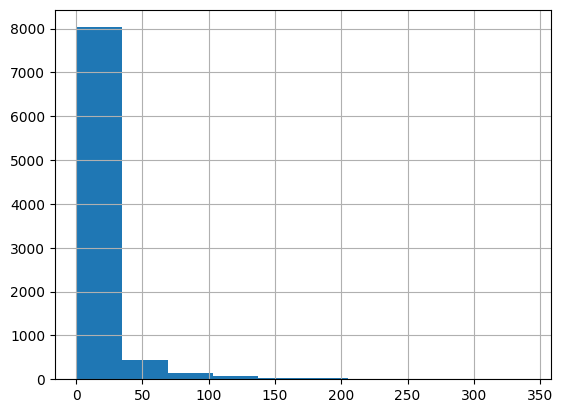

In [ ]:
# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

In [125]:
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=1)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
667    0.0
668    0.0
669    0.0
670    0.0
671    0.0
Length: 671, dtype: float64


In [126]:
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np

# Check if the matrix is non-zero after centering
if not user_ratings_centered.values.any():
    print("Matrix is entirely zeros after centering. Consider adjusting the centering method.")
    
    user_ratings_standardized = user_ratings_df.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
    user_ratings_standardized.fillna(0, inplace=True)

    # Convert to NumPy array
    user_ratings_standardized_matrix = user_ratings_standardized.values

    # Perform SVD on the standardized matrix
    U, sigma, Vt = svds(user_ratings_standardized_matrix, k=6)
    sigma = np.diag(sigma)
    print(sigma)
    
else:
    # Perform SVD with a higher k value
    U, sigma, Vt = svds(user_ratings_centered.values, k=6)
    sigma = np.diag(sigma)
    print(sigma)


Matrix is entirely zeros after centering. Consider adjusting the centering method.
[[39.25683423  0.          0.          0.          0.          0.        ]
 [ 0.         40.62920444  0.          0.          0.          0.        ]
 [ 0.          0.         41.38688185  0.          0.          0.        ]
 [ 0.          0.          0.         43.4832371   0.          0.        ]
 [ 0.          0.          0.          0.         49.36824467  0.        ]
 [ 0.          0.          0.          0.          0.         73.66737147]]


In [127]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add the row means back contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

In [128]:
# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
calc_pred_ratings_df

title,$9.99,'Neath the Arizona Skies,"'night, Mother",(500) Days of Summer,...And God Created Woman,...And Justice for All,1-900,10,10 Attitudes,10 Cloverfield Lane,...,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À Nous la Liberté,Æon Flux,İtirazım Var,Želary,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,2.549705,2.549999,2.550004,2.549753,2.550014,2.546917,2.550176,2.546712,2.550018,2.550035,...,2.547268,2.549999,2.549343,2.550259,2.548660,2.550056,2.551469,2.550016,2.549947,2.551013
2,3.479251,3.479971,3.479265,3.489538,3.480130,3.481975,3.481396,3.479263,3.479952,3.481679,...,3.464784,3.480131,3.472079,3.479869,3.467502,3.479900,3.484841,3.479934,3.480607,3.479320
3,3.566049,3.568587,3.565773,3.586859,3.568693,3.567963,3.570445,3.563692,3.568687,3.570566,...,3.555384,3.569209,3.535110,3.567378,3.560625,3.569098,3.573323,3.568418,3.569134,3.567877
4,4.344740,4.347802,4.371644,4.371046,4.348632,4.384209,4.354180,4.358987,4.347702,4.345705,...,4.310102,4.348653,4.261642,4.346051,4.290059,4.347796,4.319181,4.347922,4.349488,4.345931
5,3.913999,3.910010,3.924983,3.905412,3.909843,3.907943,3.907064,3.903932,3.909928,3.918410,...,3.919784,3.909110,3.973838,3.910502,3.899026,3.908721,3.916833,3.910132,3.910690,3.913582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3.644849,3.647016,3.650973,3.654728,3.647169,3.660816,3.649226,3.647727,3.647067,3.646716,...,3.638770,3.647407,3.628626,3.648180,3.631857,3.647303,3.658224,3.647034,3.647467,3.645004
668,3.788227,3.789440,3.789119,3.795585,3.789588,3.786319,3.790778,3.785831,3.789462,3.789042,...,3.777127,3.789685,3.767466,3.788873,3.782204,3.789664,3.785042,3.789419,3.789591,3.790547
669,3.350523,3.351284,3.354207,3.363299,3.351459,3.351825,3.352410,3.352592,3.351282,3.351512,...,3.342127,3.351674,3.312845,3.348529,3.343886,3.351448,3.331419,3.351184,3.351661,3.351695


In [136]:
# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc[4,:].sort_values(ascending=False)

print(user_5_ratings)

title
The Shawshank Redemption      4.901910
Star Wars                     4.832218
Pulp Fiction                  4.825053
Schindler's List              4.802232
The Empire Strikes Back       4.769980
                                ...   
Batman & Robin                4.099112
Congo                         4.098395
Ace Ventura: Pet Detective    4.089053
Batman Forever                4.088364
Waterworld                    4.037323
Name: 4, Length: 8754, dtype: float64


In [137]:
# Import the required libraries 
from sklearn.metrics import mean_squared_error

act_ratings_df = user_ratings_df

avg_pred_ratings_df = pd.DataFrame(np.tile(avg_ratings.values, (user_ratings_df.shape[1], 1)).T, 
                                    index=user_ratings_df.index, 
                                    columns=user_ratings_df.columns)

# Extract the ground truth to compare your predictions against
actual_values = act_ratings_df.iloc[:20, :100].values
avg_values = avg_pred_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], avg_values[mask], squared=False))
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))

1.2253892223648926
0.7461972136687866


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Hybrid Recommender**

In [508]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [509]:
id_map = pd.read_csv('The Movies Dataset/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']

print(id_map.shape)

id_map.head()

(9125, 2)


,movieId,id
0,1,862.0
1,2,8844.0
2,3,15602.0
3,4,31357.0
4,5,11862.0


In [536]:
id_map = id_map.merge(smd_2[['title', 'id']], on='id').set_index('title')
# id_map = id_map.set_index('tmdbId')

indices_map = id_map.set_index('id')

indices_map.head(2)

,movieId
id,
862.0,1
8844.0,2


In [512]:
def hybrid(userId, title, cosine_sim, recommendations_num=10):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd_2.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(recommendations_num)

In [513]:
hybrid(1, 'Avatar', combine_cosine_sim) # combine_cosine_sim ,cosine_sim_1 ,cosine_sim_2

,title,vote_count,vote_average,year,id,est
953,Aliens,3282.0,7.7,1986,679,3.305476
990,The Terminator,4208.0,7.4,1984,218,3.119988
2813,Predator,2129.0,7.3,1987,106,3.081629
8546,X-Men: Days of Future Past,6155.0,7.5,2014,127585,2.994521
8289,Star Trek Into Darkness,4479.0,7.4,2013,54138,2.924017
522,Terminator 2: Judgment Day,4274.0,7.7,1991,280,2.866526
1993,Fantastic Planet,140.0,7.6,1973,16306,2.850316
1647,Return from Witch Mountain,38.0,5.6,1978,14822,2.792317
901,The Abyss,822.0,7.1,1989,2756,2.789202
8612,Jupiter Ascending,2816.0,5.2,2015,76757,2.650298


In [514]:
hybrid(1, 'Avatar', cosine_sim_1)

,title,vote_count,vote_average,year,id,est
2058,The Matrix,9079.0,7.9,1999,603,3.431515
975,A Grand Day Out,199.0,7.4,1990,530,3.344803
7193,Moon,1831.0,7.6,2009,17431,3.165464
6102,A Trip to the Moon,314.0,7.9,1902,775,3.067446
1897,A Simple Plan,191.0,6.9,1998,10223,2.987017
5043,The Men,18.0,6.5,1950,1882,2.801266
7457,Green Zone,730.0,6.4,2010,22972,2.755149
4803,Avalon,93.0,6.8,2001,10881,2.752488
3359,The Dish,62.0,6.6,2000,5257,2.744727
2853,The Hidden,85.0,6.7,1987,12476,2.736452


In [515]:
hybrid(1, 'Avatar', cosine_sim_2)

,title,vote_count,vote_average,year,id,est
953,Aliens,3282.0,7.7,1986,679,3.305476
990,The Terminator,4208.0,7.4,1984,218,3.119988
8546,X-Men: Days of Future Past,6155.0,7.5,2014,127585,2.994521
1600,Darby O'Gill and the Little People,35.0,6.7,1959,18887,2.966115
8289,Star Trek Into Darkness,4479.0,7.4,2013,54138,2.924017
522,Terminator 2: Judgment Day,4274.0,7.7,1991,280,2.866526
1993,Fantastic Planet,140.0,7.6,1973,16306,2.850316
1647,Return from Witch Mountain,38.0,5.6,1978,14822,2.792317
901,The Abyss,822.0,7.1,1989,2756,2.789202
8612,Jupiter Ascending,2816.0,5.2,2015,76757,2.650298


In [517]:
hybrid(500, 'Avatar', cosine_sim_2)

,title,vote_count,vote_average,year,id,est
522,Terminator 2: Judgment Day,4274.0,7.7,1991,280,3.299566
1600,Darby O'Gill and the Little People,35.0,6.7,1959,18887,3.295808
953,Aliens,3282.0,7.7,1986,679,3.260069
8546,X-Men: Days of Future Past,6155.0,7.5,2014,127585,3.193105
1993,Fantastic Planet,140.0,7.6,1973,16306,3.156194
1647,Return from Witch Mountain,38.0,5.6,1978,14822,3.122093
1355,Titanic,7770.0,7.5,1997,597,3.094197
2111,Superman II,642.0,6.5,1980,8536,3.047064
8289,Star Trek Into Darkness,4479.0,7.4,2013,54138,3.025839
7004,Star Wars: The Clone Wars,434.0,5.8,2008,12180,2.986171
